# matplotlib

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

For all plots, make sure that you use labels with units as appropriate, and make good choices about all of the plot characteristics like fontsize, colors, and markersize. I'll be grading your plots with clarity and design in mind.

There are no functions set up for you in this assignment. You can write functions to use in your code if you want, or not — it is up to you. I'll be manually grading these questions by inspection, so there are no tests for you to run.

### 1. Plot a sin wave

Plot the function sin($2 \pi x$) from x = 0 to 20. Label the graph, where the x-axis is time, and the y-axis is amplitude. Make sure you use enough points in $x$ that the function is resolved or fully visible.

---

Grading rubric [4 points]:

* [2 pts] Plotted data is correct over the right range
* [2 pts] Asthetics: Colors, resolution of line, labels, etc.


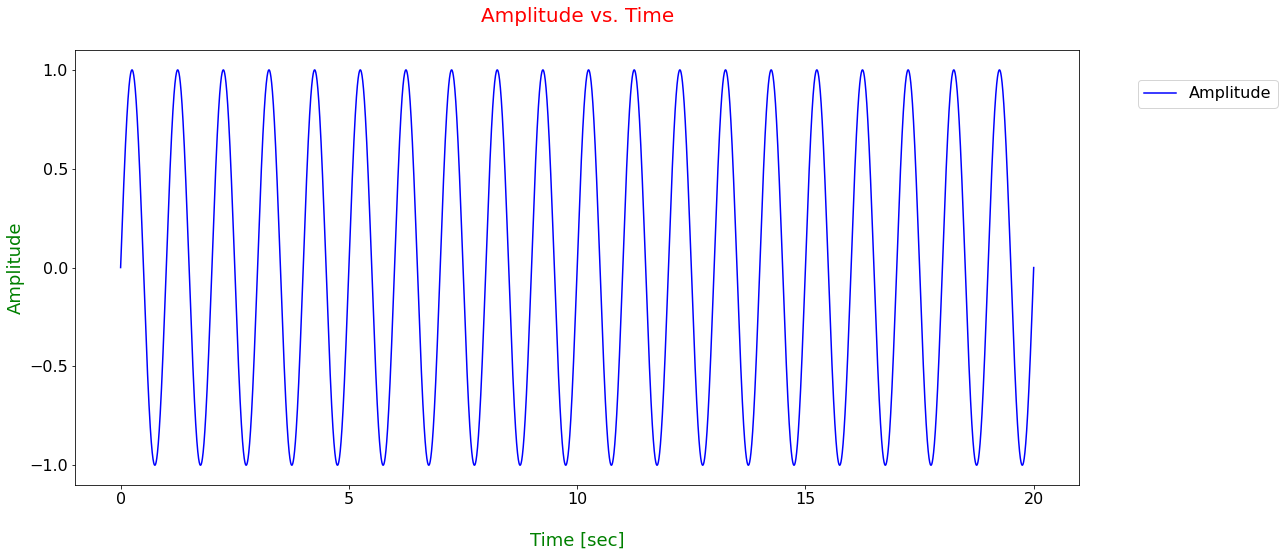

In [2]:
x1 = np.linspace(0,20,8000)
y1 = np.sin(2*np.pi*x1)

fig1 = plt.figure(figsize=(18,8))
ax1 = fig1.add_subplot(111)

ax1.set_title("Amplitude vs. Time\n",fontsize = 20,color="red")
ax1.set_ylabel("Amplitude",fontsize=18,color = "green")
ax1.set_xlabel("\nTime [sec]",fontsize=18,color = "green")

#I had to search stackoverflow for changing the number of ticks in a plot. 
#Source: https://www.delftstack.com/howto/matplotlib/matplotlib-set-number-of-ticks/

ax1.xaxis.set_ticks(np.linspace(0,20,5))
ax1.yaxis.set_ticks(np.linspace(-1,1,5))
ax1.tick_params(axis="x",labelsize=16)
ax1.tick_params(axis="y",labelsize=16)

ax1.plot(x1,y1,"-",color="blue")
ax1.legend(["Amplitude"],bbox_to_anchor=(1.05, 0.95),fontsize = 16)

### 2. Plot a function and the mean

Plot the fourth power of the same function as in problem 1, [sin($2 \pi x$)]$^4$, over the same range, x = 0 to 20. Plot the mean of this function over the range using a distinct line style. Lable the axes and lines.

---

Grading rubric [4 points]:

* [2 pts] Plotted data is correct
* [2 pts] Asthetics: readability, colors, labels, etc.

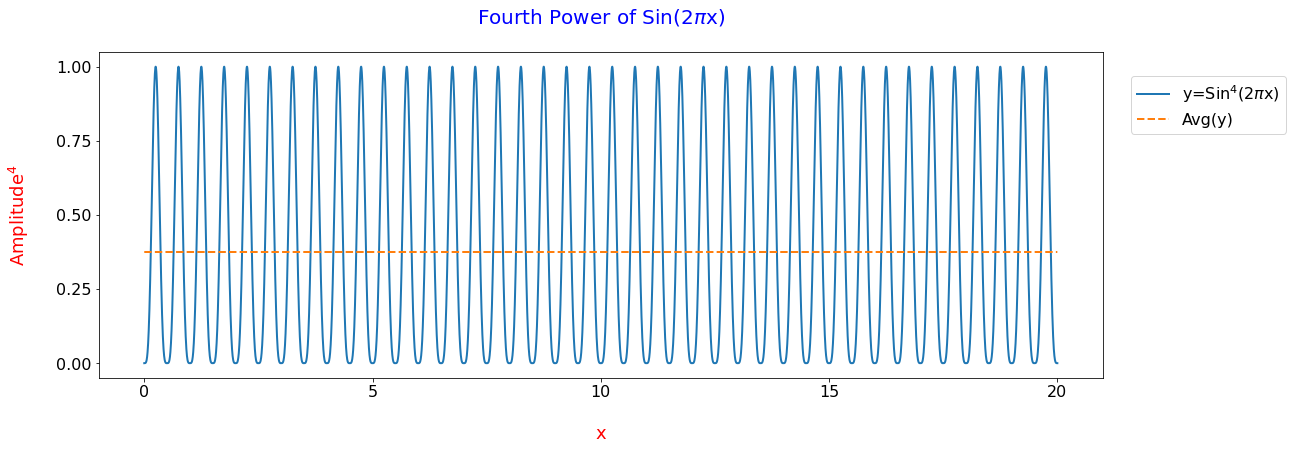

In [3]:
y2 = y1**4
y3 = np.mean(y2)
y4 = (np.ones_like(x1))*y3

fig2 = plt.figure(figsize=(18,6))
ax2 = fig2.add_subplot(111)
ax2.set_title("Fourth Power of Sin(2$\pi$x)\n",fontsize=20,color="blue")
ax2.set_ylabel("Amplitude$^4$\n",fontsize = 18,color = "red")
ax2.set_xlabel("\nx",fontsize = 18,color = "red")
ax2.xaxis.set_ticks(np.linspace(0,20,5))
ax2.yaxis.set_ticks(np.linspace(0,1,5))
ax2.tick_params(axis="x",labelsize=16)
ax2.tick_params(axis="y",labelsize=16)

#ax2.set_xlim((0,25))
ax2.plot(x1,y2,"-",x1,y4,"--",lw=2)
ax2.legend(("y=Sin$^4$(2$\pi$x)","Avg(y)"),bbox_to_anchor=(1.02,0.95),fontsize=16)

### 3. Fit a line and plot

Load in the long-term Mauna Loa carbon dioxide dataset:

    mauna_loa_co2 = np.genfromtxt('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt')

to access the CO$_2$ data (use the interpolated column since the data gaps are filled). Make two figures based on this data:

##### Figure 1
Fit a 1st (straight line), 3rd, and 5th order polynomial to the data, then plot the polynomial fits along with the original data to compare. The fits should be shown only in the range of the data.

###### Figure 2
Also, use your polynomial fits to predict CO$_2$ in the year 2150. Show your predictions by making another plot and showing the three polynomials extended out to 2150. Then print the function values at 2150.

###### Interpretation
Which polynomial fit do you think is best and why?

---

Grading rubric [8 points]:

* [3 pts] Plotted data and polynomial fits that are labeled, clear, and look nice. The polynomial fits should look reasonable for the data.
* [3 pts] Get proper values for the prediction at 2150 and show extension into future graphically in plot.
* [2 pts] Interpretation explanation.

In [4]:
from datetime import datetime, timedelta

# read in and rename data
mauna_loa_co2 = np.genfromtxt('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt')
print(type(mauna_loa_co2))
print(mauna_loa_co2.shape)

co2 = mauna_loa_co2[:,4]
datetime = mauna_loa_co2[:,2]
#print(type(co2),type(datetime))
#print(co2.shape,datetime.shape)

#Fitting polynomial models.
lin = np.polyfit(datetime,co2,1)
cub = np.polyfit(datetime,co2,3)
fif = np.polyfit(datetime,co2,5)
#print(lin,cub,fif)

<class 'numpy.ndarray'>
(756, 8)


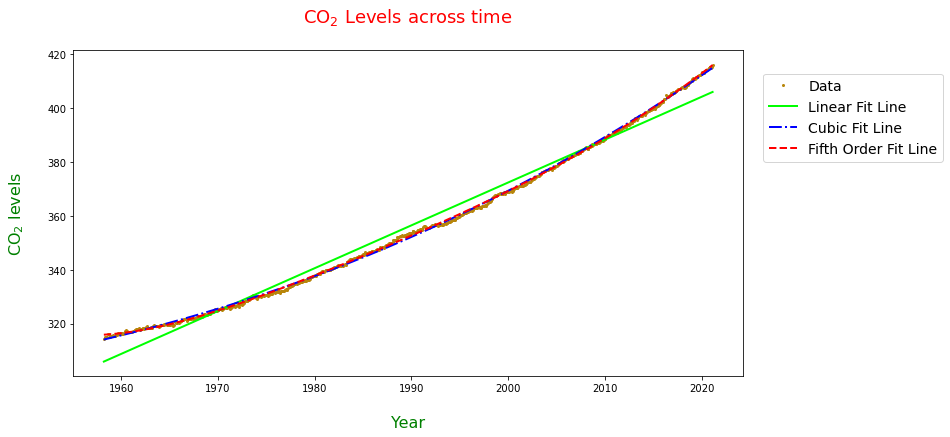

In [5]:
## This cell creates a plot of the CO2 data and fits all three polynomial models to the data in the same axes.

fig3 = plt.figure(figsize=(12,6))
ax3 = fig3.add_subplot(111)
ax3.set_title("CO$_2$ Levels across time\n",fontsize=18,color="red")
ax3.set_ylabel("CO$_2$ levels\n",fontsize=16,color="green")
ax3.set_xlabel("\nYear",fontsize=16,color="green")
ax3.yaxis.set_ticks(np.linspace(300,420,7))
#ax3.xaxis.set_ticks(np.linspace(1950,2020,7))
ax3.plot(datetime,co2,"o",color="darkgoldenrod",ms=2)
ax3.plot(datetime,(lin[0]*datetime+lin[1]),"-",color="lime",lw=2)
ax3.plot(datetime,(cub[0]*datetime**3+cub[1]*datetime**2+cub[2]*datetime+cub[3]),"-.",color="blue",lw=2)
ax3.plot(datetime,(fif[0]*datetime**5+fif[1]*datetime**4+fif[2]*datetime**3+fif[3]*datetime**2+fif[4]*datetime+fif[5]),"--",color="red",lw=2)
ax3.legend(["Data","Linear Fit Line","Cubic Fit Line","Fifth Order Fit Line"],bbox_to_anchor=(1.02,0.95),fontsize = 14)

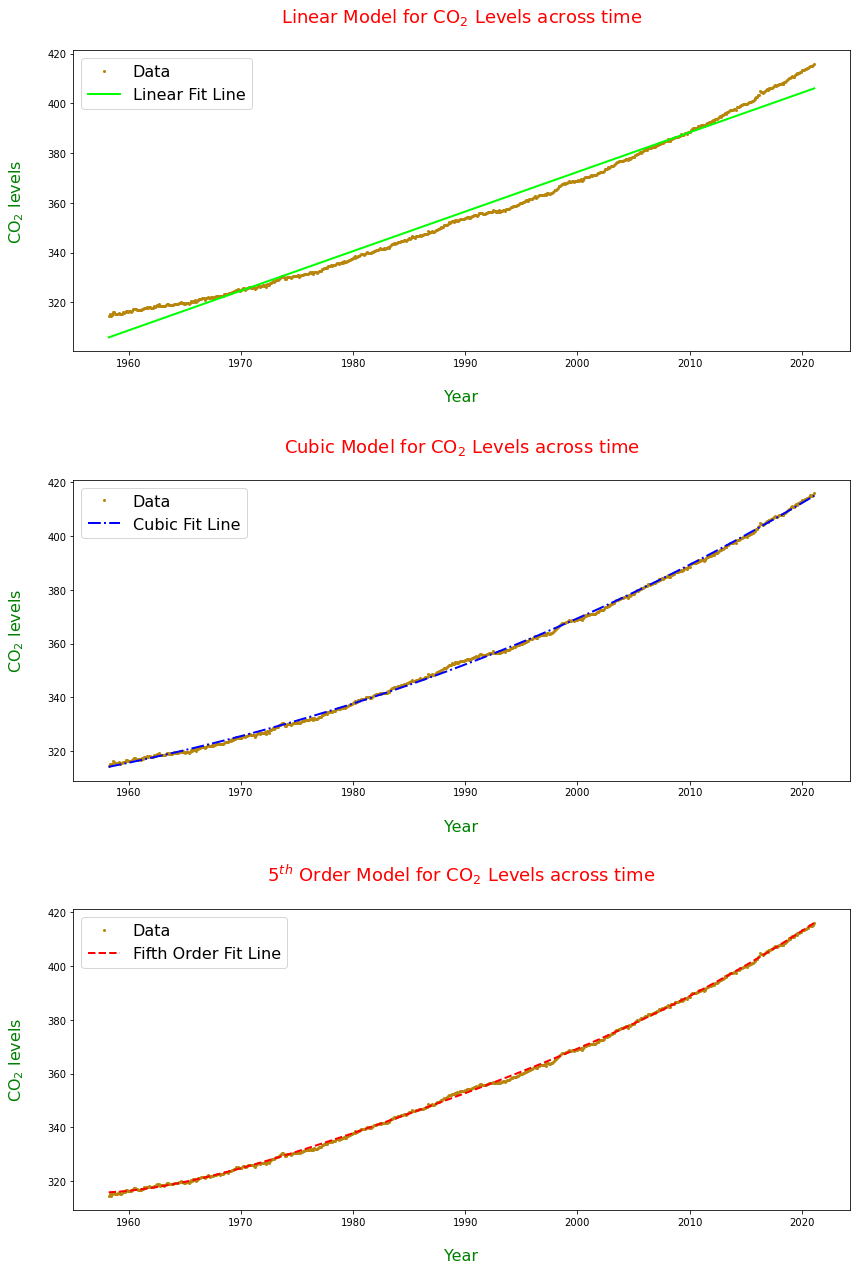

In [6]:
## This cell creates a plot of the CO2 data and fits the three polynomials to the data in three different axes.

fig32 = plt.figure(figsize=(12,18))
ax31 = fig32.add_subplot(311)
ax32 = fig32.add_subplot(312)
ax33 = fig32.add_subplot(313)

## Setting up the axes for each figure.
ax31.set_title("Linear Model for CO$_2$ Levels across time\n",fontsize=18,color="red")
ax31.set_ylabel("CO$_2$ levels\n",fontsize=16,color="green")
ax31.set_xlabel("\nYear\n",fontsize=16,color="green")
ax31.yaxis.set_ticks(np.linspace(300,420,7))

ax32.set_title("Cubic Model for CO$_2$ Levels across time\n",fontsize=18,color="red")
ax32.set_ylabel("CO$_2$ levels\n",fontsize=16,color="green")
ax32.set_xlabel("\nYear\n",fontsize=16,color="green")
ax32.yaxis.set_ticks(np.linspace(300,420,7))


ax33.set_title("5$^t$"+"$^h$ Order Model for CO$_2$ Levels across time\n",fontsize=18,color="red")
ax33.set_ylabel("CO$_2$ levels\n",fontsize=16,color="green")
ax33.set_xlabel("\nYear\n",fontsize=16,color="green")
ax33.yaxis.set_ticks(np.linspace(300,420,7))
## End of axes setup

##Plotting each figure.
ax31.plot(datetime,co2,"o",color="darkgoldenrod",ms=2)
ax31.plot(datetime,(lin[0]*datetime+lin[1]),"-",color="lime",lw=2)
ax31.legend(["Data","Linear Fit Line"],loc="upper left",fontsize = 16)

ax32.plot(datetime,co2,"o",color="darkgoldenrod",ms=2)
ax32.plot(datetime,(cub[0]*datetime**3+cub[1]*datetime**2+cub[2]*datetime+cub[3]),"-.",color="blue",lw=2)
ax32.legend(["Data","Cubic Fit Line"],loc="upper left",fontsize = 16)

ax33.plot(datetime,co2,"o",color="darkgoldenrod",ms=2)
ax33.plot(datetime,(fif[0]*datetime**5+fif[1]*datetime**4+fif[2]*datetime**3+fif[3]*datetime**2+fif[4]*datetime+fif[5]),"--",color="red",lw=2)
ax33.legend(["Data","Fifth Order Fit Line"],loc="upper left",fontsize = 16)

plt.tight_layout()

In [7]:
#Also, use your polynomial fits to predict CO 2  in the year 2150

print(f"CO2 Level in 2150, Predicted by the Linear Model: {np.polyval(lin, 2150)}")
print(f"CO2 Level in 2150, Predicted by the Cubic Model: {np.polyval(cub, 2150)}")
print(f"CO2 Level in 2150, Predicted by the Fifth Order Model: {np.polyval(fif, 2150)}")

CO2 Level in 2150, Predicted by the Linear Model: 611.0398267711321
CO2 Level in 2150, Predicted by the Cubic Model: 1065.9641957786225
CO2 Level in 2150, Predicted by the Fifth Order Model: -4873.318315982819


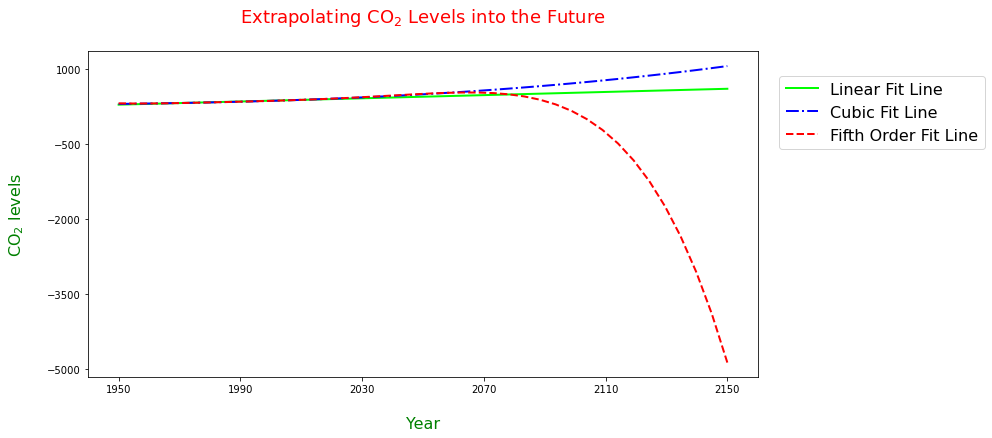

In [8]:
xdummy = np.linspace(1950,2150,40)
fig4 = plt.figure(figsize=(12,6))
ax4 = fig4.add_subplot(111)
ax4.set_title("Extrapolating CO$_2$ Levels into the Future\n",fontsize=18,color="red")
ax4.set_ylabel("CO$_2$ levels\n",fontsize=16,color="green")
ax4.set_xlabel("\nYear",fontsize=16,color="green")
ax4.yaxis.set_ticks(np.linspace(-5000,1000,5))
ax4.xaxis.set_ticks(np.linspace(1950,2150,6))
ax4.plot(xdummy,(lin[0]*xdummy+lin[1]),"-",color="lime",lw=2)
ax4.plot(xdummy,(cub[0]*xdummy**3+cub[1]*xdummy**2+cub[2]*xdummy+cub[3]),"-.",color="blue",lw=2)
ax4.plot(xdummy,(fif[0]*xdummy**5+fif[1]*xdummy**4+fif[2]*xdummy**3+fif[3]*xdummy**2+fif[4]*xdummy+fif[5]),"--",color="red",lw=2)
ax4.legend(["Linear Fit Line","Cubic Fit Line","Fifth Order Fit Line"],bbox_to_anchor=(1.02,0.95),fontsize = 16)

# Discussion on the best model fit for CO2 data.

From comparing the data with the linear model fit line, we see that the linear model has a high bias. The data (from visualization) is clearly non-linear and hence the high bias of a linear model should be expected. So, we eliminate the linear model as the least "good-fit" model.

However, the decision between the cubic model and the fifth order model is not as straightforward. When comparing in the range of available data, they both seem (from visualization, without any R-squared or other metrics) to fit the data very well. But when we extrapolate the predictions to the year 2150, the fifth order fitline goes to ~ -5000, indicating its strong variability. So, the fifth order model is less biased than the linear model, but has very high variance. This high variance comes from model's overfitting of the available data.

Conclusion: Of the three polynomial models investigated here, the cubic model gives the best fit with a reasonable balance between bias and variance.